# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [229]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup as soup
import matplotlib.pyplot as plt
import pandas as pd

In [230]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [231]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = 'https://static.bc-edx.com/data/web/mars_facts/temperature.html'
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [232]:
# Create a Beautiful Soup Object
html = browser.html
html_soup = soup(html, 'html.parser')

In [233]:
# Extract all rows of data
tbody = html_soup.find('tbody')
table = tbody.find_all('tr', class_='data-row')
table

[<tr class="data-row">
 <td>2</td>
 <td>2012-08-16</td>
 <td>10</td>
 <td>155</td>
 <td>6</td>
 <td>-75.0</td>
 <td>739.0</td>
 </tr>,
 <tr class="data-row">
 <td>13</td>
 <td>2012-08-17</td>
 <td>11</td>
 <td>156</td>
 <td>6</td>
 <td>-76.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>24</td>
 <td>2012-08-18</td>
 <td>12</td>
 <td>156</td>
 <td>6</td>
 <td>-76.0</td>
 <td>741.0</td>
 </tr>,
 <tr class="data-row">
 <td>35</td>
 <td>2012-08-19</td>
 <td>13</td>
 <td>157</td>
 <td>6</td>
 <td>-74.0</td>
 <td>732.0</td>
 </tr>,
 <tr class="data-row">
 <td>46</td>
 <td>2012-08-20</td>
 <td>14</td>
 <td>157</td>
 <td>6</td>
 <td>-74.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>57</td>
 <td>2012-08-21</td>
 <td>15</td>
 <td>158</td>
 <td>6</td>
 <td>-78.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>68</td>
 <td>2012-08-22</td>
 <td>16</td>
 <td>158</td>
 <td>6</td>
 <td>-77.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>79</td>
 <td>2012-08-

In [234]:
# Extract Header Row for id, terrestrial_date etc.
temperature_headers = html_soup.find_all('th')
temperature_headers

[<th>id</th>,
 <th>terrestrial_date</th>,
 <th>sol</th>,
 <th>ls</th>,
 <th>month</th>,
 <th>min_temp</th>,
 <th>pressure</th>]

In [235]:
header_list = []
for header in temperature_headers:
    header_list.append(header.text)
header_list

['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [236]:
# Create an empty list
temperature_list = []
# Loop through the scraped data to create a list of rows
for x in table:
    #has to be inside loop otherwise it will duplicated data if its not cleared each loop iteration
    temperature_row = []
    temperature_data = x.find_all('td')
    for data in temperature_data:
        temperature_row.append(data.text)
    temperature_list.append(temperature_row)
temperature_list

[['2', '2012-08-16', '10', '155', '6', '-75.0', '739.0'],
 ['13', '2012-08-17', '11', '156', '6', '-76.0', '740.0'],
 ['24', '2012-08-18', '12', '156', '6', '-76.0', '741.0'],
 ['35', '2012-08-19', '13', '157', '6', '-74.0', '732.0'],
 ['46', '2012-08-20', '14', '157', '6', '-74.0', '740.0'],
 ['57', '2012-08-21', '15', '158', '6', '-78.0', '740.0'],
 ['68', '2012-08-22', '16', '158', '6', '-77.0', '740.0'],
 ['79', '2012-08-23', '17', '159', '6', '-76.0', '742.0'],
 ['112', '2012-08-27', '21', '161', '6', '-74.0', '741.0'],
 ['114', '2012-08-28', '22', '162', '6', '-74.0', '742.0'],
 ['123', '2012-08-29', '23', '162', '6', '-75.0', '741.0'],
 ['134', '2012-08-30', '24', '163', '6', '-75.0', '742.0'],
 ['145', '2012-08-31', '25', '163', '6', '-75.0', '743.0'],
 ['156', '2012-09-01', '26', '164', '6', '-76.0', '745.0'],
 ['163', '2012-09-02', '27', '164', '6', '-75.0', '743.0'],
 ['170', '2012-09-03', '28', '165', '6', '-75.0', '745.0'],
 ['171', '2012-09-04', '29', '166', '6', '-75.0',

In [237]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
mars_temperature_df = pd.DataFrame(temperature_list, columns=header_list)

In [238]:
# Confirm DataFrame was created successfully
mars_temperature_df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [239]:
# Examine data type of each column
mars_temperature_df.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [240]:
# Change data types for data analysis
mars_temperature_df = mars_temperature_df.astype({"id": int,
                                                  "terrestrial_date": 'datetime64[ns]',
                                                  "sol": int,
                                                  "ls": int,
                                                  "month": int,
                                                  "min_temp": float,
                                                  "pressure": float})

In [241]:
# Confirm type changes were successful by examining data types again
mars_temperature_df.dtypes

id                           int32
terrestrial_date    datetime64[ns]
sol                          int32
ls                           int32
month                        int32
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [242]:
# 1. How many months are there on Mars?
number_of_months_mars = mars_temperature_df["month"].nunique()
number_of_months_mars

12

In [243]:
# 2. How many Martian days' worth of data are there?
number_of_data_days_mars = mars_temperature_df["sol"].nunique()
number_of_data_days_mars

1867

In [244]:
# 3. What is the average low temperature by month?
months_mars = mars_temperature_df.groupby("month")
average_low_mars = months_mars["min_temp"].mean()
average_low_mars.head(12)


month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

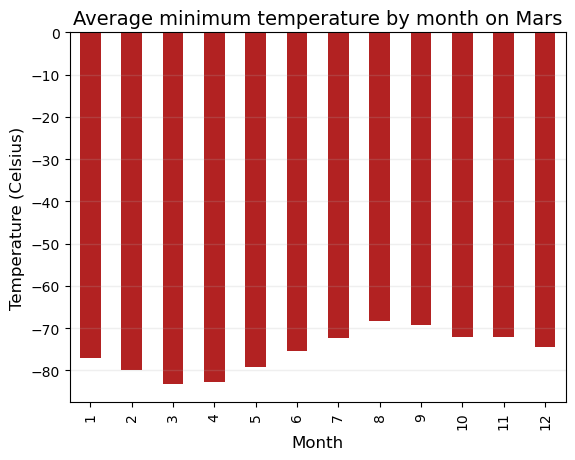

In [246]:
# Plot the average temperature by month
color=['firebrick']
average_low_mars.plot(kind="bar", color=color)
plt.xlabel("Month", fontsize = 12)
plt.grid(linestyle='-', linewidth=1, alpha=0.2, axis = 'y')
plt.ylabel("Temperature (Celsius)", fontsize = 12)
plt.title("Average minimum temperature by month on Mars", fontsize = 14)
plt.savefig("AverageTemperatureMars.png")
plt.show()

In [ ]:
# Identify the coldest and hottest months in Curiosity's location
mars_coldest = average_low_mars.min()
#mars_coldest
mars_coldest_month = average_low_mars.idxmin()
#mars_coldest_month
print(f"Mars Coldest Month was Month: {mars_coldest_month}. The temperature was: {round(mars_coldest,2)} Celsius.")
mars_warmest = average_low_mars.max()
#mars_warmest
mars_warmest_month = average_low_mars.idxmax()
#mars_warmest_month
print(f"Mars Warmest Month was Month: {mars_warmest_month}. The temperature was: {round(mars_warmest,2)} Celsius.")

In [ ]:
# 4. Average pressure by Martian month
average_monthly_pressure = months_mars["pressure"].mean()
average_monthly_pressure.head(12)

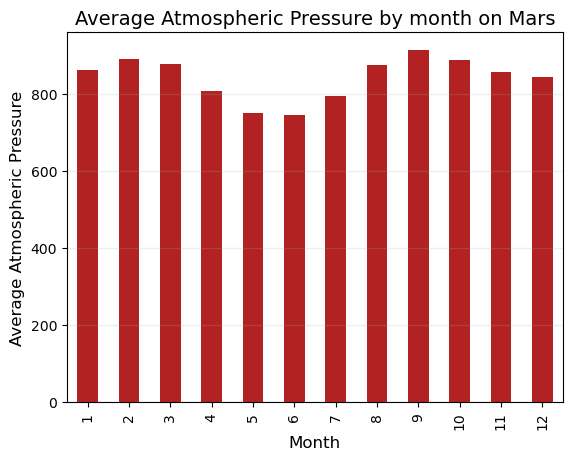

In [247]:
# Plot the average pressure by month
average_monthly_pressure.plot(kind="bar", color=color)
plt.xlabel("Month", fontsize = 12)
plt.grid(linestyle='-', linewidth=1, alpha=0.2, axis = 'y')
plt.ylabel("Average Atmospheric Pressure", fontsize = 12)
plt.title("Average Atmospheric Pressure by month on Mars", fontsize = 14)
plt.savefig("AverageAtmosphericPressureMars.png")
plt.show()

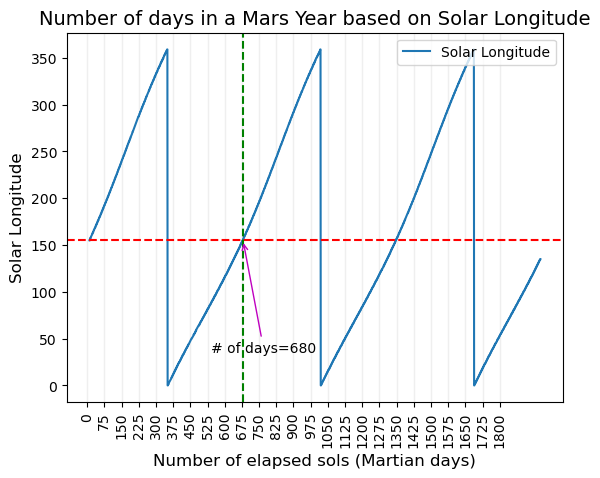

According to this analysis the Martian year is approximately: 680 days long.


In [266]:
# 5. How many terrestrial (earth) days are there in a Martian year?
# Given the data we have the way to approach this would be to compare `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars to 'ls': the solar longitude.
sort_sol_mars = mars_temperature_df.sort_values("sol")
#sort_sol_mars
sort_sol_mars.plot(x="sol", y="ls", label='Solar Longitude')
plt.legend(loc='upper right')
#make a line showing the 
plt.axhline(y=sort_sol_mars.ls[0], color='r', linestyle='--')
plt.xticks(range(0, 1867, 75), rotation=90)
plt.grid(linestyle='-', linewidth=1, alpha=0.2, axis='x')
plt.ylabel("Solar Longitude", fontsize = 12)
plt.xlabel("Number of elapsed sols (Martian days)", fontsize = 12)
plt.title("Number of days in a Mars Year based on Solar Longitude", fontsize = 14)
count = 0
for i in range(0, len(sort_sol_mars)):
    if sort_sol_mars.ls[i] > sort_sol_mars.ls[0] and sort_sol_mars.ls[i-1] <= sort_sol_mars.ls[0]:
        count += 1
        if count == 2:
            sol_val = sort_sol_mars.sol[i]
            plt.axvline(x=sol_val, color='g', linestyle='--')
            plt.annotate(f'# of days={sol_val}', xy=(sol_val, sort_sol_mars.ls[0]), xytext=(sol_val - 140, sort_sol_mars.ls[0] - 120),
                         arrowprops=dict(arrowstyle='->', color='m'))
            break
plt.savefig("HowLongIsaMarsYear.png")
plt.show()
print(f"According to this analysis the Martian year is approximately: {sol_val} days long.")

On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [250]:
sort_sol_mars

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


In [251]:
# Write the data to a CSV
mars_temperature_df.to_csv("marsweather.csv", index=False)

In [252]:
browser.quit()